### HRC Thermistor Temperatures & Trends

A forecast for Henry Bergner's HRC Thermal model, by Grant Tremblay

In [69]:
import os

import datetime as dt

from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import dates

import numpy as np
from scipy.interpolate import spline
from scipy.interpolate import interp1d
from scipy.signal import hilbert

try:
    from hrcsentinel import hrccore as hrc
except ImportError:
    raise ImportError(
        "hrcsentinel required. Download here: \
        https://github.com/granttremblay/HRCsentinel")

Establish location of MSIDs, fetched by HRCsentinel, as well as the directory you'd like to save figures in. 

In [70]:
home_directory = os.path.expanduser("~")
msid_directory = home_directory + "/Dropbox/Work/HRCOps/MSIDCloud/"

figure_save_directory = home_directory + "/Desktop/"

Thermistor MSIDs we care about:

In [72]:
msids = [
    "2FE00ATM",  # Front-end Temperature (c)
    "2LVPLATM",  # LVPS Plate Temperature (c)
    "2IMHVATM",  # Imaging Det HVPS Temperature (c)
    "2IMINATM",  # Imaging Det Temperature (c)
    "2SPHVATM",  # Spectroscopy Det HVPS Temperature (c)
    "2SPINATM",  # Spectroscopy Det Temperature (c)
    "2PMT1T"  ,  # PMT 1 EED Temperature (c)
    "2PMT2T"  ,  # PMT 2 EED Temperature (c)
    "2DCENTRT",  # Outdet2 EED Temperature (c)
    "2FHTRMZT",  # FEABox EED Temperature (c)
    "2CHTRPZT",  # CEABox EED Temperature (c)
    "2FRADPYT",  # +Y EED Temperature (c)
    "2CEAHVPT",  # -Y EED Temperature (c)
    "2CONDMXT",  # Conduit Temperature (c)
    "2UVLSPXT",  # Snout Temperature (c)
    #"2CE00ATM",  # CEA Temperature 1 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    #"2CE01ATM",  # CEA Temperature 2 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    "2FEPRATM",  # FEA PreAmp (c)
    # "2SMTRATM",  # Selected Motor Temperature (c) THIS IS ALWAYS 5 DEGREES THROUGHOUT ENTIRE MISSION
    "2DTSTATT"   # OutDet1 Temperature (c)
]


msids_full = [
    "2FE00ATM",  # Front-end Temperature (c)
    "2LVPLATM",  # LVPS Plate Temperature (c)
    "2IMHVATM",  # Imaging Det HVPS Temperature (c)
    "2IMINATM",  # Imaging Det Temperature (c)
    "2SPHVATM",  # Spectroscopy Det HVPS Temperature (c)
    "2SPINATM",  # Spectroscopy Det Temperature (c)
    "2PMT1T"  ,  # PMT 1 EED Temperature (c)
    "2PMT2T"  ,  # PMT 2 EED Temperature (c)
    "2DCENTRT",  # Outdet2 EED Temperature (c)
    "2FHTRMZT",  # FEABox EED Temperature (c)
    "2CHTRPZT",  # CEABox EED Temperature (c)
    "2FRADPYT",  # +Y EED Temperature (c)
    "2CEAHVPT",  # -Y EED Temperature (c)
    "2CONDMXT",  # Conduit Temperature (c)
    "2UVLSPXT",  # Snout Temperature (c)
    "2CE00ATM",  # CEA Temperature 1 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    "2CE01ATM",  # CEA Temperature 2 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    "2FEPRATM",  # FEA PreAmp (c)
    "2SMTRATM",  # Selected Motor Temperature (c) THIS IS ALWAYS 5 DEGREES THROUGHOUT ENTIRE MISSION
    "2DTSTATT"   # OutDet1 Temperature (c)
]

Instantiate an empty dictionary for all of these MSIDs:

In [73]:
data = {}

Populate the MSIDs with times and values. We'll use daily averages. Uses the simple `parse_generic_msid()` function from [HRCsentinel](https://github.com/granttremblay/HRCsentinel). 

In [75]:
valtype = "means"
binning = "daily"

for msidname in msids:
    print("Reading {} {} for {}".format(binning, valtype.upper(), msidname))
    times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_{}_lifetime.csv".format(binning), valtype)
    _, stds = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_{}_lifetime.csv".format(binning), "stds")
    data["{}_times".format(msidname)] = times
    data["{}_values".format(msidname)] = values
    data["{}_stds".format(msidname)] = stds
    
# for msidname in msids_full:
#     print("Reading {} {} for {}".format(binning, valtype.upper(), msidname))
#     times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_{}_lifetime.csv".format(binning), valtype)
#     _, stds = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_{}_lifetime.csv".format(binning), "stds")
#     data["{}_times".format(msidname)] = times
#     data["{}_values".format(msidname)] = values
#     data["{}_stds".format(msidname)] = stds

Reading daily MEANS for 2FE00ATM
Reading daily MEANS for 2LVPLATM
Reading daily MEANS for 2IMHVATM
Reading daily MEANS for 2IMINATM
Reading daily MEANS for 2SPHVATM
Reading daily MEANS for 2SPINATM
Reading daily MEANS for 2PMT1T
Reading daily MEANS for 2PMT2T
Reading daily MEANS for 2DCENTRT
Reading daily MEANS for 2FHTRMZT
Reading daily MEANS for 2CHTRPZT
Reading daily MEANS for 2FRADPYT
Reading daily MEANS for 2CEAHVPT
Reading daily MEANS for 2CONDMXT
Reading daily MEANS for 2UVLSPXT
Reading daily MEANS for 2FEPRATM
Reading daily MEANS for 2DTSTATT


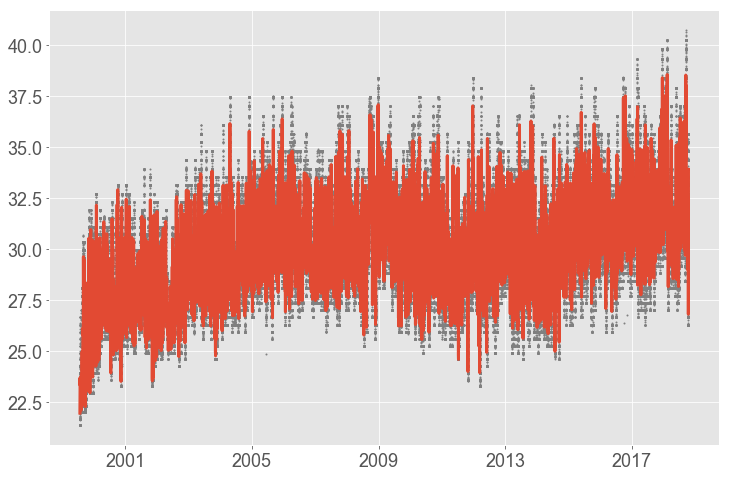

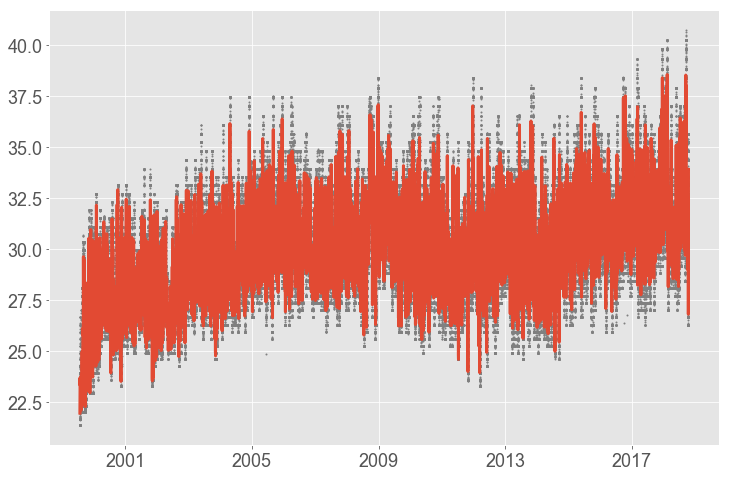

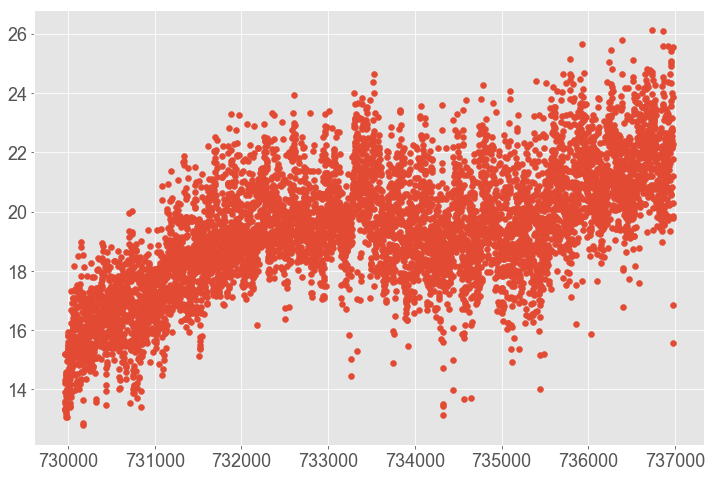

In [76]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(data['2FE00ATM_times'], data['2FE00ATM_values'])

plt.show()

`data` just uses the `means`, which is probably the most appropriate choice. Let's also read in new dictionaries for the min and 5min values, too. 

In [77]:
# I've commented this out because we don't need it for now. 

# mins = {}
# valtype = "mins"
# binning = "5min"

# for msidname in msids:
#     print("Reading {} {} for {}".format(binning, valtype.upper(), msidname))
#     times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_{}_lifetime.csv".format(binning), valtype)
#     mins["{}_times".format(msidname)] = times
#     mins["{}_values".format(msidname)] = values

# maxes= {}
# valtype = "maxes"
# binning = "5min"

# for msidname in msids:
#     print("Reading {} {} for {}".format(binning, valtype.upper(), msidname))
#     times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_{}_lifetime.csv".format(binning), valtype)
#     maxes["{}_times".format(msidname)] = times
#     maxes["{}_values".format(msidname)] = values

You can quickly plot any of these with, e.g., 

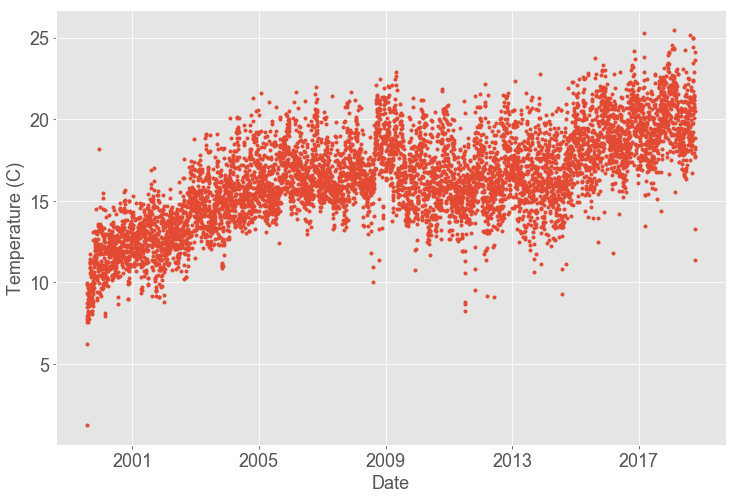

In [78]:
outfile = figure_save_directory + "2CE00ATM.pdf"
hrc.dateplot(data['2CONDMXT_times'], data['2CONDMXT_values'], ylabel="Temperature (C)", markersize=3.0, save=False, filename=outfile)

You can compute 30 day means and write it to a sortable table like this:

In [79]:
ave_table = Table()

all_names = []
all_means = []
all_stds = []


for msidname in msids:
    daybin = 100 # number of days over which to average the daily averages
    mean = np.mean(data["{}_values".format(msidname)][-daybin:]).round(2)
    std = np.std(data["{}_values".format(msidname)][-daybin:]).round(2)
    
    all_names.append(msidname)
    all_means.append(mean)
    all_stds.append(std)
    
ave_table["MSIDName"] = all_names
ave_table["Average".format(daybin)] = all_means
ave_table["STD"] = all_stds

In [80]:
ave_table

MSIDName,Average,STD
str8,float64,float64
2FE00ATM,21.88,1.61
2LVPLATM,28.15,1.47
2IMHVATM,31.62,1.46
2IMINATM,19.11,1.78
2SPHVATM,32.41,1.95
2SPINATM,20.43,1.75
2PMT1T,21.6,2.37
2PMT2T,24.01,2.63
2DCENTRT,19.51,1.87


Sort the table in ascending order by Average temperature, so that we can make a pretty sequential plot later

In [81]:
ave_table.sort("Average")
ave_table

MSIDName,Average,STD
str8,float64,float64
2UVLSPXT,15.65,2.04
2FRADPYT,17.81,2.02
2IMINATM,19.11,1.78
2DCENTRT,19.51,1.87
2DTSTATT,20.1,1.9
2CONDMXT,20.17,2.07
2SPINATM,20.43,1.75
2PMT1T,21.6,2.37
2FE00ATM,21.88,1.61


Now create a REORDERED list of MSID names, ordered by increasing average temperature, in order to make pretty sequential color cycles

In [82]:
ordered_msidlist = ave_table["MSIDName"]

We can plot all MSIDs together, like this: 

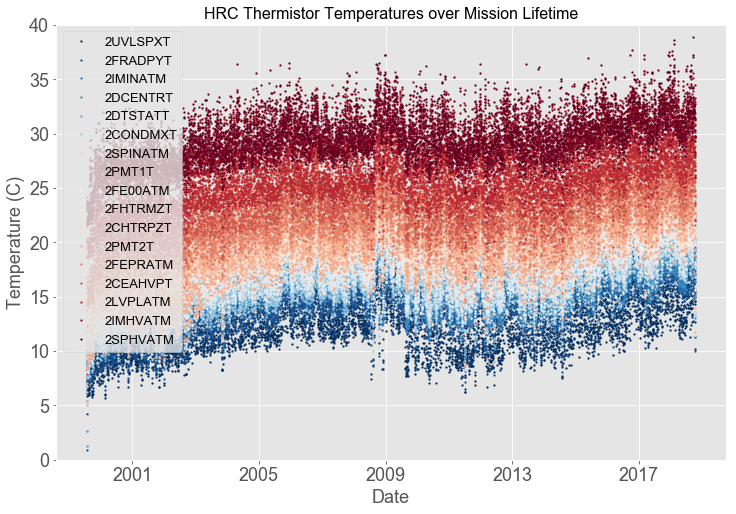

In [131]:
figure_savename = figure_save_directory + "all_msids_figure.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points. 

fig, ax = plt.subplots(figsize=(12, 8))

n_lines = len(ordered_msidlist)
color_idx = np.linspace(0, 1, n_lines)


for i, msidname in zip(color_idx, ordered_msidlist):
    ax.plot_date(data["{}_times".format(msidname)],
                 data["{}_values".format(msidname)], '.', alpha=1.0, markersize=2.5, label='{}'.format(msidname), color=plt.cm.RdBu_r(i), rasterized=rasterized)
    ax.set_ylabel('Temperature (C)')
    ax.set_xlabel('Date')
    ax.set_ylim(0, 40)
    
    ax.set_title("HRC Thermistor Temperatures over Mission Lifetime")
    #ax.legend()
    #ax.set_ylim(10, 40)


ax.legend(loc=2, prop={'size': 13})
    
plt.show()

fig.savefig(figure_savename, dpi=300)

We can also easily take a yearly (i.e. 365 day window) moving average to smooth this out. This is effectively an efficient convolution. 

In [84]:
window = 365 # days, i.e. a year

In [85]:
def compute_yearly_average(values, window):
    
    array = values

    cumulative_sum, moving_aves = [0], []

    for i, x in enumerate(array, 1):
        cumulative_sum.append(cumulative_sum[i-1] + x)
        if i>=window:
            moving_ave = (cumulative_sum[i] - cumulative_sum[i-window])/window
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
            
    # Ensure that this is a Numpy array, so that we can do some proper vector math with it. 
    moving_ave_array = np.asarray(moving_aves)
    return moving_ave_array
    

Run this function in a loop to compute and plot all moving averages

In [86]:
all_trends = {}

for msidname in msids: 
    moving_aves = compute_yearly_average(data["{}_values".format(msidname)], window)
    moving_stds = compute_yearly_average(data["{}_stds".format(msidname)], window)
    all_trends["{}_trend".format(msidname)] = moving_aves
    all_trends["{}_stds".format(msidname)] = moving_stds


This, of course, does not preserve array size - it cuts off the first 364 datapoints if your window is 365 days

In [87]:
len(data["2UVLSPXT_times"]) - len(all_trends["2UVLSPXT_trend"])

364

But we can be super lazy and just fix this on-the-fly, e.g.

In [88]:
time_corrector = window - 1

In [89]:
len(data["2UVLSPXT_times"][time_corrector:]) - len(all_trends["2UVLSPXT_trend"])

0

Good. Now let's show this moving average overplotted with actual values. We'll also show the $\pm3,6,9\sigma$ on the moving average. This will allow us to characterize just how far of a deviation from the moving average those most extreme temperature spikes represent. 

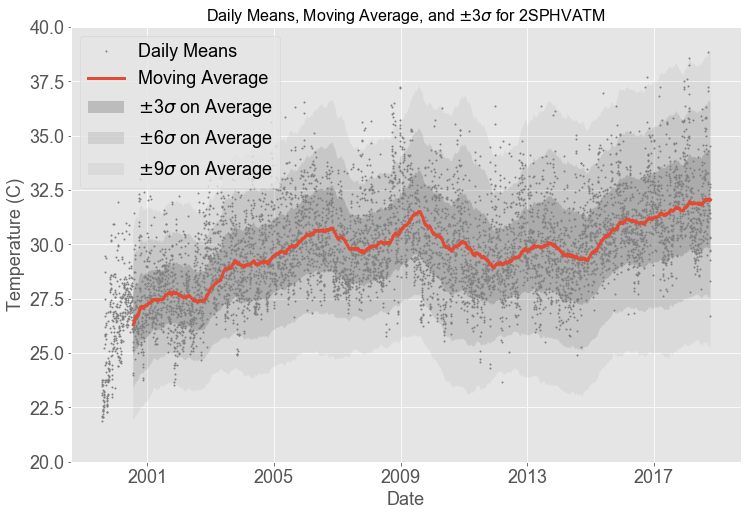

In [130]:
figure_savename = figure_save_directory + "trend_plus_realdata_comparison.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points. 

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

ax.plot_date(data["2SPHVATM_times"], data["2SPHVATM_values"], '.',markersize=2, color='gray', rasterized=rasterized, label="Daily Means")
ax.plot_date(data["2SPHVATM_times"][time_corrector:], all_trends["2SPHVATM_trend"], '-', lw=3, rasterized=rasterized, label="Moving Average")

ax.fill_between(data["2SPHVATM_times"][time_corrector:], all_trends["2SPHVATM_trend"] + 3*all_trends["2SPHVATM_stds"], all_trends["2SPHVATM_trend"] - 3*all_trends["2SPHVATM_stds"], facecolor='gray', alpha=0.4, label=r"$\pm$3$\sigma$ on Average")
ax.fill_between(data["2SPHVATM_times"][time_corrector:], all_trends["2SPHVATM_trend"] + 6*all_trends["2SPHVATM_stds"], all_trends["2SPHVATM_trend"] - 6*all_trends["2SPHVATM_stds"], facecolor='gray', alpha=0.2, label=r"$\pm$6$\sigma$ on Average")
ax.fill_between(data["2SPHVATM_times"][time_corrector:], all_trends["2SPHVATM_trend"] + 9*all_trends["2SPHVATM_stds"], all_trends["2SPHVATM_trend"] - 9*all_trends["2SPHVATM_stds"], facecolor='gray', alpha=0.1, label=r"$\pm$9$\sigma$ on Average")



ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

ax.set_ylim(20,40)

ax.legend()

ax.set_title(r"Daily Means, Moving Average, and $\pm$3$\sigma$ for 2SPHVATM")

plt.show()

fig.savefig(figure_savename, dpi=300)

In [91]:
time_corrector

364

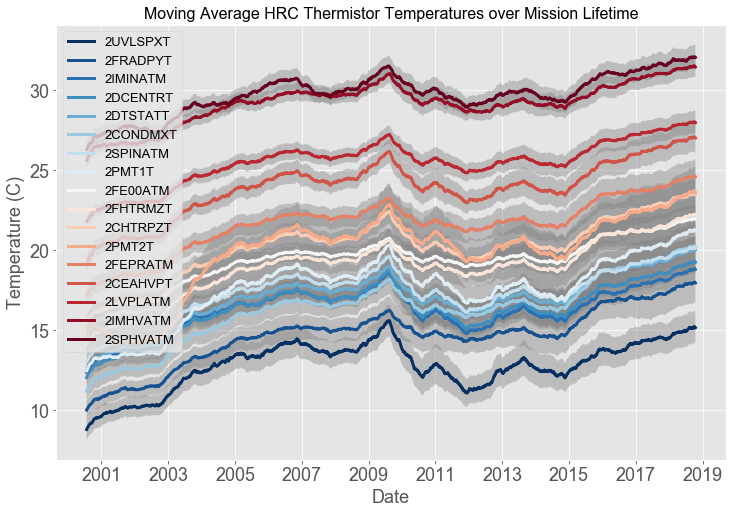

In [129]:
figure_savename = figure_save_directory + "all_trends_lifetime.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    #ax.plot(all_trends["{}_trend".format(msidname)], lw=3.0, label=msidname, color=plt.cm.coolwarm(i))
    ax.plot_date(data["{}_times".format(msidname)][time_corrector:], all_trends["{}_trend".format(msidname)], '-', label='{}'.format(msidname), lw=3.0, color=plt.cm.RdBu_r(i), rasterized=rasterized)
    ax.fill_between(data["{}_times".format(msidname)][time_corrector:], all_trends["{}_trend".format(msidname)] + all_trends["{}_stds".format(msidname)], all_trends["{}_trend".format(msidname)] - all_trends["{}_stds".format(msidname)], facecolor='gray', alpha=0.4 )

ax.legend(loc=0, prop={'size': 13})

ax.set_title("Moving Average HRC Thermistor Temperatures over Mission Lifetime")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

plt.show()

fig.savefig(figure_savename, dpi=300)

The slope has clearly been pretty constant (and roughly the same for all thermistors!) over the past twoish years, i.e. Oct. 2015 - now: 

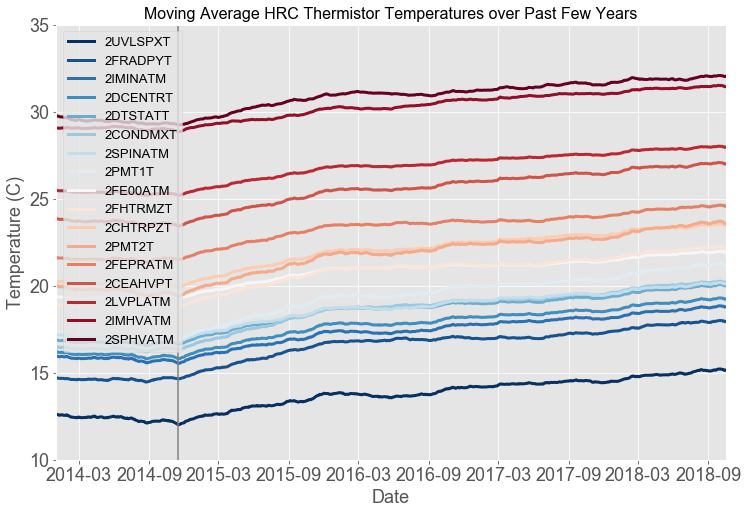

In [94]:
figure_savename = figure_save_directory + "all_trends_recent.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    #ax.plot(all_trends["{}_trend".format(msidname)], lw=3.0, label=msidname, color=plt.cm.coolwarm(i))
    ax.plot_date(data["{}_times".format(msidname)][time_corrector:], all_trends["{}_trend".format(msidname)], '-', label='{}'.format(msidname), lw=3.0, color=plt.cm.RdBu_r(i), rasterized=rasterized)


ax.legend(prop={'size': 13})

ax.set_title("Moving Average HRC Thermistor Temperatures over Past Few Years")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

# By eye, this is roughly the time of the slope change
inflection = dt.date(2014, 11, 15)

ax.set_xlim(dt.date(2014, 1, 1), dt.date(2018, 10, 17))
ax.set_ylim(10, 35)

ax.axvline(inflection, color='gray')

plt.show()

fig.savefig(figure_savename, dpi=300)

`inflection` is the datetime of the vertical line above. Lets find the nearest index that corresponds to that date, so that we can compute clean slopes starting at that index, toward the end of each trend array. 

In [95]:
def find_index_at_date(array,value):
    '''
    Given an input array, find the index of the item in that array closest to the given value
    '''
    index = (np.abs(array-value)).argmin()
    return index

In [96]:
start_index = find_index_at_date(data["2UVLSPXT_times"][time_corrector:], dates.date2num(inflection))
start_index

5228

Now we can calculate the slopes of every thermistor over this time interval. We can easily do this with `numpy.polyfit()`. 

In [97]:
def fit_slope(x, y):
    coeffs = np.polyfit(x, y, deg=1)
    # for a deg=1 (linear) polynomial, m, b = coeffs[0], coeffs[1] in y = mx + b
    
    return coeffs

Check that it works. 

In [98]:
fit_slope(data["2UVLSPXT_times"][time_corrector:][start_index:], all_trends["2UVLSPXT_trend"][start_index:])

array([  1.79912944e-03,  -1.31067969e+03])

Compute coefficients for all MSIDs: 

In [99]:
all_coeffs = {} # instantiate an emtpy dictionary to hold these

for msidname in names:
    coeffs = fit_slope(data["{}_times".format(msidname)][time_corrector:][start_index:], all_trends["{}_trend".format(msidname)][start_index:])
    print("Slope and Intercept for {} are {}, adding to all_coeffs dictionary.".format(msidname, coeffs))
    all_coeffs["{}".format(msidname)] = coeffs

Slope and Intercept for 2UVLSPXT are [  1.79912944e-03  -1.31067969e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2FRADPYT are [  1.79071412e-03  -1.30163059e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2IMINATM are [  1.88148127e-03  -1.36771151e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2DCENTRT are [  1.97235922e-03  -1.43420664e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2DTSTATT are [  1.88128923e-03  -1.36633573e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2CONDMXT are [  2.25411767e-03  -1.64078122e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2SPINATM are [  1.94680493e-03  -1.41445709e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2PMT1T are [  2.52734707e-03  -1.84117913e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2FE00ATM are [  1.44833018e-03  -1.04533833e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2FHTRMZT are [ 

In [100]:
years_to_forecast = 10
daypad = years_to_forecast * 365
future_timerange = np.arange(dates.date2num(inflection), dates.date2num(inflection)+daypad, 10)

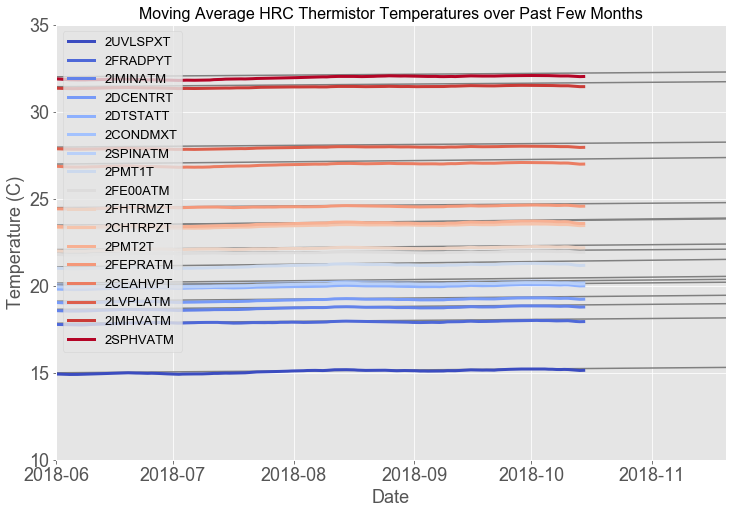

In [127]:
figure_savename = figure_save_directory + "slope_plot.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    ax.plot(future_timerange, all_coeffs["{}".format(msidname)][0] * future_timerange + all_coeffs["{}".format(msidname)][1], '-', color='gray')
    ax.plot_date(data["{}_times".format(msidname)][364:][start_index:], all_trends["{}_trend".format(msidname)][start_index:], '-', lw=3.0, label='{}'.format(msidname), color=plt.cm.coolwarm(i), rasterized=rasterized)


ax.legend(prop={'size': 13}, loc=2)

ax.set_title("Moving Average HRC Thermistor Temperatures over Past Few Months")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

# By eye, this is roughly the time of the slope change
inflection = dt.date(2014, 11, 15)

ax.set_xlim(dt.date(2018, 6, 1), dt.date(2018, 11, 20))
ax.set_ylim(10, 35)

ax.axvline(inflection, color='gray')

plt.show()

fig.savefig(figure_savename, dpi=300)

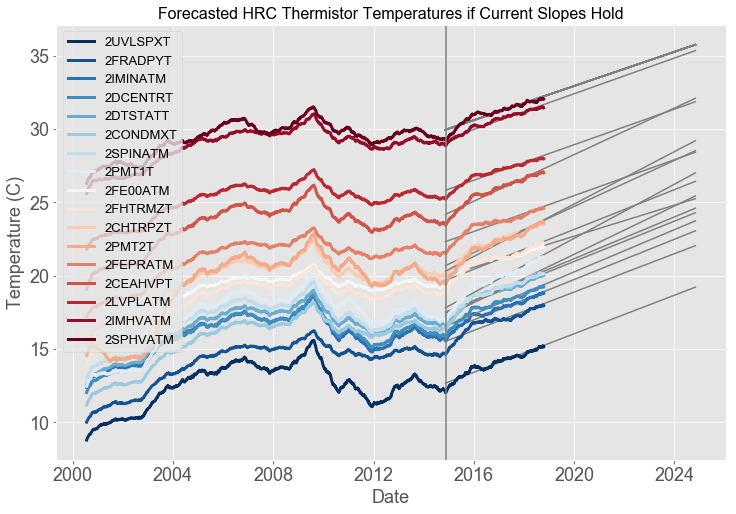

In [128]:
figure_savename = figure_save_directory + "all_trends_and_slopes_lifetime.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    ax.plot(future_timerange, all_coeffs["{}".format(msidname)][0] * future_timerange + all_coeffs["{}".format(msidname)][1], '-', color='gray')
    ax.plot(future_timerange, coeffs[0] * future_timerange + coeffs[1], color='gray')
    ax.plot_date(data["{}_times".format(msidname)][364:], all_trends["{}_trend".format(msidname)], '-', lw=3.0, label='{}'.format(msidname), color=plt.cm.RdBu_r(i), rasterized=rasterized)


ax.legend(loc=2, prop={'size': 13})

ax.set_title("Forecasted HRC Thermistor Temperatures if Current Slopes Hold")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

ax.axvline(inflection, color='gray')

plt.show()

fig.savefig(figure_savename, dpi=300)

#### Forecasts

Finally, we can make some (very simple) projections, under the (almost assuredly incorrect) assumption that the current (i.e. ~2 year) slope holds for the next 10 years. This will very likely not be the case. But it's still a useful exercise, and probably not *too* far off. Ralph, Dan, and Paul will have good thoughts on this, too. 

In [103]:
def forecast_future_temp(year, msidname, coeffs):
    
    # Find the index of the future timeline at given year
    timeline = np.arange(dates.date2num(dt.datetime(2016, 1, 1)), dates.date2num(dt.datetime(2035, 1, 1)), 10)
    index = find_index_at_date(timeline, dates.date2num(dt.datetime(year, 1, 1)))
    
    # Forecast the temperature using the best-fit line
    future_temp = (coeffs[0] * timeline[index] + coeffs[1]).round(2)
    
    #print("{} in {} at {} degrees C.".format(msidname, year, future_temp))
    #print("{}".format(future_temp))
    return future_temp

In [104]:
namecolumn = names
forecasts = {}

years_to_forecast = [2018, 2020, 2022, 2024, 2026, 2028, 2030]

for year in years_to_forecast:
#     print("\nForecasting for {}".format(year))
#     print("--------------------")
    
    templist = []
    for msidname in names: 
        temp = forecast_future_temp(year, msidname, all_coeffs["{}".format(msidname)])
        templist.append(temp)
    forecasts["{}".format(year)] = templist

Let's create a clean Astropy table of these forecasts for easier portability, etc. 

In [105]:
forecast_table = Table()

forecast_table["MSID Names"] = namecolumn
forecast_table["2018"] = forecasts["2018"]
forecast_table["2020"] = forecasts["2020"]
forecast_table["2022"] = forecasts["2022"]
forecast_table["2024"] = forecasts["2024"]
forecast_table["2026"] = forecasts["2026"]
forecast_table["2028"] = forecasts["2028"]
forecast_table["2030"] = forecasts["2030"]

In [106]:
forecast_table

MSID Names,2018,2020,2022,2024,2026,2028,2030
str8,float64,float64,float64,float64,float64,float64,float64
2UVLSPXT,14.73,16.04,17.35,18.67,19.98,21.29,22.61
2FRADPYT,17.58,18.88,20.19,21.5,22.81,24.11,25.42
2IMINATM,18.36,19.74,21.11,22.48,23.86,25.23,26.61
2DCENTRT,18.82,20.26,21.7,23.14,24.58,26.02,27.46
2DTSTATT,19.6,20.97,22.35,23.72,25.09,26.47,27.84
2CONDMXT,19.81,21.46,23.1,24.75,26.4,28.04,29.69
2SPINATM,19.74,21.16,22.58,24.01,25.43,26.85,28.27
2PMT1T,20.7,22.55,24.39,26.24,28.08,29.93,31.77
2FE00ATM,21.64,22.7,23.75,24.81,25.87,26.92,27.98


Save this as FITS and ASCII tables. 

In [107]:
forecast_table_fits = fits.BinTableHDU(data=forecast_table)
forecast_table_fits.writeto(figure_save_directory + "forecast_table.fits", overwrite=True)

ascii.write(forecast_table, figure_save_directory + "forecast_table.txt")

#### A look at the most extreme temperature spikes

In [108]:
spike_msids = [
    "2FHTRMZT",  # FEABox EED Temperature (c)
    "2FRADPYT",  # +Y EED Temperature (c)
    "2CE00ATM", 
    "2SPHVATM",
    "2IMHVATM"
]

In [109]:
highres_data = {}
highres_valtype = 'vals'

for msidname in spike_msids:
    print("Reading FULL {} for {}".format(highres_valtype.upper(), msidname))
    times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_full_pastyear.csv", highres_valtype)
    highres_data["{}_times".format(msidname)] = times
    highres_data["{}_values".format(msidname)] = values

Reading FULL VALS for 2FHTRMZT
Reading FULL VALS for 2FRADPYT
Reading FULL VALS for 2CE00ATM
Reading FULL VALS for 2SPHVATM
Reading FULL VALS for 2IMHVATM


In [110]:
fivemin_data = {}
fivemin_valtype = 'maxes'

for msidname in spike_msids:
    print("Reading fivemin {} for {}".format(fivemin_valtype.upper(), msidname))
    times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_5min_lifetime.csv", fivemin_valtype)
    fivemin_data["{}_times".format(msidname)] = times
    fivemin_data["{}_values".format(msidname)] = values

Reading fivemin MAXES for 2FHTRMZT
Reading fivemin MAXES for 2FRADPYT
Reading fivemin MAXES for 2CE00ATM
Reading fivemin MAXES for 2SPHVATM
Reading fivemin MAXES for 2IMHVATM


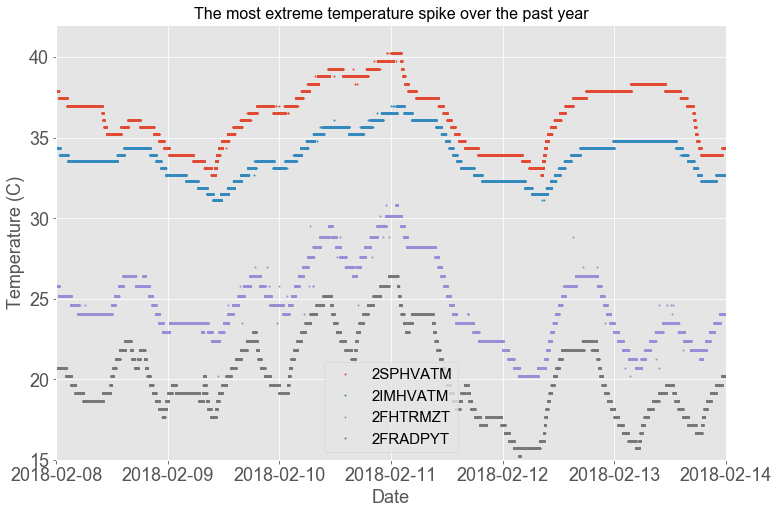

In [111]:
figure_savename = figure_save_directory + "spikes.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points. 

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

ax.plot_date(highres_data['2SPHVATM_times'], highres_data['2SPHVATM_values'], 'o', markersize=1, rasterized=rasterized, label="2SPHVATM")
ax.plot_date(highres_data['2IMHVATM_times'], highres_data['2IMHVATM_values'], 'o', markersize=1, rasterized=rasterized, label="2IMHVATM")
ax.plot_date(highres_data['2FHTRMZT_times'], highres_data['2FHTRMZT_values'], 'o', markersize=1, rasterized=rasterized, label="2FHTRMZT")
ax.plot_date(highres_data['2FRADPYT_times'], highres_data['2FRADPYT_values'], 'o', markersize=1, rasterized=rasterized, label="2FRADPYT")
# ax.plot_date(highres_data['2CE00ATM_times'], highres_data['2CE00ATM_values'], 'o', markersize=1, rasterized=rasterized, label="2CE00ATM")

ax.set_ylim(15, 42)

x1 = dt.datetime(2018, 2, 8)
x2 = dt.datetime(2018, 10, 17)

ax.set_xlim(x1, x2)

ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

ax.legend(prop={'size': 15})
ax.set_title("The most extreme temperature spike over the past year")

plt.show()

fig.savefig(figure_savename, dpi=300)

#### Encode data by Pitch angle and spacecraft altitude

We can effectively treat the Pitch and Altitude MSIDs as lookup tables...

In [112]:
spacecraft_msids = ["Point_SunCentAng", "Dist_SatEarth"]

spacecraft = {} # Again, instantiate an empty dictionary

for msidname in spacecraft_msids:
    print("Reading 5MIN {} for {}".format(valtype.upper(), msidname))
    times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_5min_lifetime.csv", valtype)
    spacecraft["{}_times".format(msidname)] = times
    spacecraft["{}_values".format(msidname)] = values


Reading 5MIN MEANS for Point_SunCentAng
Reading 5MIN MEANS for Dist_SatEarth


In [113]:
densemask = np.in1d(spacecraft['Point_SunCentAng_times'], fivemin_data['2SPHVATM_times'])
sparsemask = np.in1d(fivemin_data['2SPHVATM_times'], spacecraft['Point_SunCentAng_times'][densemask])

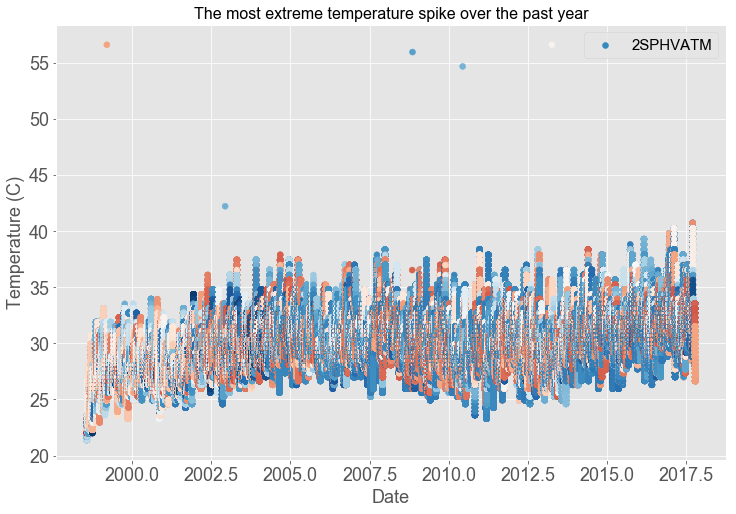

In [114]:
figure_savename = figure_save_directory + "spikes.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points. 

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

scattertimes = fivemin_data['2SPHVATM_times'][sparsemask] / 365.2422

ax.scatter(scattertimes, fivemin_data['2SPHVATM_values'][sparsemask], c=spacecraft['Point_SunCentAng_values'][densemask], cmap=plt.cm.RdBu, rasterized=rasterized, label="2SPHVATM")
# ax.plot_date(highres_data['2CE00ATM_times'], highres_data['2CE00ATM_values'], 'o', markersize=1, rasterized=rasterized, label="2CE00ATM")



ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

ax.legend(prop={'size': 15})
ax.set_title("The most extreme temperature spike over the past year")

plt.show()

fig.savefig(figure_savename, dpi=300)